In [4]:
%pip install numpy
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\aileen\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages (1.23.4)




[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\aileen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\aileen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\aileen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import concepts as concepts
import numpy as np
from matrix_predictions import *
from concepts import *
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.markers as mk
# Image(filename='Format.png') 

In [62]:
matrix = (6, 3, 4, 3, 3, 1, 4, 1)
# matrix = (2, 7, 9, 0, 5, 4, 1, 8)
display_matrix(matrix)

game = matrix_to_game(matrix)

# game = (1,1,5,1,3,1,1,1)
display_game(game)

process_games([matrix])

-----------------------
| 6        | 4        |
|        3 |        3 |
-----------------------
| 3        | 4        |
|        1 |        1 |
-----------------------
-----------------------
| 3 + 3    | 4        |
|        3 |    3 + 0 |
-----------------------
| 3        | 4 + 0    |
|    1 + 0 |        1 |
-----------------------


([0.0449262439231334],
 [(6, 3, 4, 3, 3, 1, 4, 1)],
 ([(0.2, 0.8, 0.25, 0.75)],
  [(0.5278640450004206,
    0.4721359549995794,
    0.3090169943749474,
    0.6909830056250525)],
  [(0.4000016777500456,
    0.5999983222499544,
    0.18242364708535658,
    0.8175763529146434)],
  [(0.3475190128094297,
    0.6524809871905703,
    0.17282334747995176,
    0.8271766525200482)]))

In [3]:
import matplotlib.pyplot as plt
t =np.arange(0,100,0.02)
values = []
for value in t:
    values.append((quantal_response_equilibrium(game, lmbda=value)[0],quantal_response_equilibrium(game, lmbda=value)[3]))
values = np.asarray(values)

C:\Users\aileen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\aileen\Courses\ec106\Exploratory-Mixed-2x2-Games\concepts.py:178: RuntimeWarning: overflow encountered in exp
  P = p - np.exp(lmbda * E_up(q)) / (np.exp(lmbda * E_up(q)) + np.exp(lmbda * E_down(q)))
c:\Users\aileen\Courses\ec106\Exploratory-Mixed-2x2-Games\concepts.py:178: RuntimeWarning: invalid value encountered in double_scalars
  P = p - np.exp(lmbda * E_up(q)) / (np.exp(lmbda * E_up(q)) + np.exp(lmbda * E_down(q)))
c:\Users\aileen\Courses\ec106\Exploratory-Mixed-2x2-Games\concepts.py:179: RuntimeWarning: overflow encountered in exp
  Q = q - np.exp(lmbda * E_left(p)) / (np.exp(lmbda * E_left(p)) + np.exp(lmbda * E_right(p)))
c:\Use

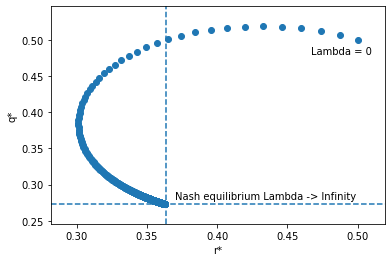

In [79]:
plt.scatter(values[:,0],values[:,1])
plt.axhline(0.2727,linestyle='--')
plt.axvline(0.3636,linestyle='--')
plt.text(0.37,0.28,'Nash equilibrium Lambda -> Infinity')
plt.text(0.51,0.48,'Lambda = 0',horizontalalignment='right')
plt.xlabel('r*')
plt.ylabel('q*')
plt.show()

In [2]:
distinguishability_values, games, (ne_pdxns, ibe_pdxns, qre_pdxns, ase_pdxns) = main(4)

tot_sum = []
for game in games:
    tot_sum.append(np.sum(game))

# indices = []
# for index, item in enumerate(distinguishability_values):
#     if item > 0.25:
#         indices.append(index)

40
69559
0.296671321745908


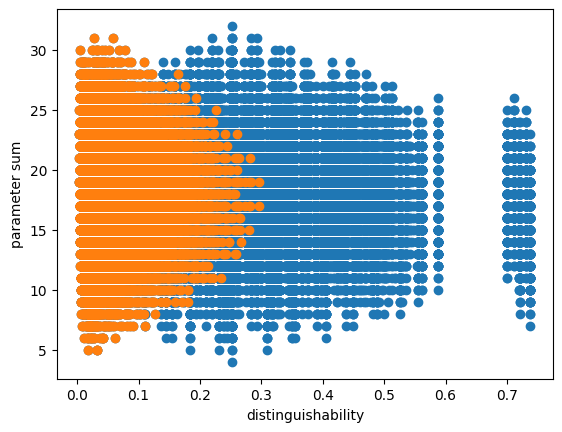

In [6]:
# tot_sum = []
# for game in games:
#     tot_sum.append(np.sum(game))

indices = []
indices2 = []


# filter out games where the ibe prediction is a pure strategy for both parties
for index, item in enumerate(ibe_pdxns):
    p, _, q, _ = item
    if not((p == 0 or p == 1) and (q == 0 or q == 1)):
        indices.append(index)

def check_probablity(i):
    p1, _, q1, _ = ibe_pdxns[i]
    p2, _, q2, _ = ne_pdxns[i]
    p3, _, q3, _ = qre_pdxns[i]
    p4, _, q4, _ = ase_pdxns[i]
    valid1 = (p1 >= 0 and p1 <= 1) and (q1 >= 0 and q1 <= 1)
    valid2 = (p2 >= 0 and p2 <= 1) and (q2 >= 0 and q2 <= 1)
    valid3 = (p3 >= 0 and p3 <= 1) and (q3 >= 0 and q3 <= 1)
    valid4 = (p4 >= 0 and p4 <= 1) and (q4 >= 0 and q4 <= 1)
    return valid1 and valid2 and valid3 and valid4


best_games = []
bestest_games = []
winners = []

valid_predictions = []
for i in indices:
    if check_probablity(i):
        valid_predictions.append(i)
        dv = distinguishability_values[i]
        if dv > 0.25:
            best_games.append(i)
            if dv > 0.28:
                bestest_games.append(i)
                if dv > 0.29:
                    winners.append(i)


# print(len(indices))
print(len(best_games))
print(len(valid_predictions))

filt_dv = [distinguishability_values[i] for i in valid_predictions]
filt_ts = [tot_sum[i] for i in valid_predictions]

filt_dv_bg = [distinguishability_values[i] for i in best_games]
filt_ts_bg = [tot_sum[i] for i in best_games]

filt_dv_bg2 = [distinguishability_values[i] for i in bestest_games]
filt_ts_bg2 = [tot_sum[i] for i in bestest_games]

win_dv = [distinguishability_values[i] for i in winners]
win_ts = [tot_sum[i] for i in winners]


plt.scatter(distinguishability_values,tot_sum)
plt.xlabel("distinguishability")
plt.ylabel("parameter sum")
plt.scatter(filt_dv,filt_ts)
#plt.scatter(filt_dv2,filt_ts2)

#plt.scatter(filt_dv_bg,filt_ts_bg)

print(max(filt_dv))
# best_game = filt_dv.index()
# display_game(games[best_game])
# print(distinguishability_values[best_game])


7
0.296671321745908


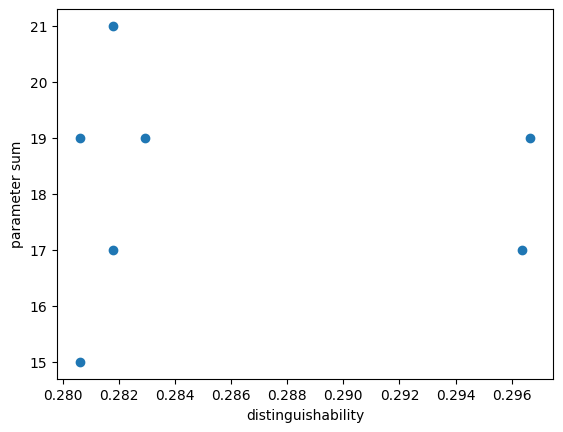

In [7]:
print(len(bestest_games))

plt.scatter(filt_dv_bg2,filt_ts_bg2)
plt.xlabel("distinguishability")
plt.ylabel("parameter sum")

print(max(filt_dv))

In [10]:
print(len(winners))
print([distinguishability_values[i] for i in winners])
[(ibe_pdxns[i],ne_pdxns[i],qre_pdxns[i]) for i in winners]

2
[0.2963532496538739, 0.296671321745908]


[((0.46862696659688585,
   0.5313730334031141,
   0.8881088075291328,
   0.1118911924708672),
  (0.8, 0.2, 0.2, 0.8),
  (0.8415773123651922,
   0.15842268763480782,
   0.42266815795920276,
   0.5773318420407972)),
 ((0.48528137423857026,
   0.5147186257614298,
   0.8945735017712878,
   0.1054264982287122),
  (0.8, 0.2, 0.2, 0.8),
  (0.8415773123651922,
   0.15842268763480782,
   0.4226681579592028,
   0.5773318420407971))]

In [9]:
for index in winners:
    display_matrix(game_to_matrix(games[index]))
    display_game(games[index])
    print()

-----------------------
| 4        | 4        |
|        3 |        4 |
-----------------------
| 0        | 5        |
|        4 |        0 |
-----------------------
-----------------------
| 0 + 4    | 4        |
|        3 |    3 + 1 |
-----------------------
| 0        | 4 + 1    |
|    0 + 4 |        0 |
-----------------------

-----------------------
| 5        | 4        |
|        4 |        5 |
-----------------------
| 1        | 5        |
|        4 |        0 |
-----------------------
-----------------------
| 1 + 4    | 4        |
|        4 |    4 + 1 |
-----------------------
| 1        | 4 + 1    |
|    0 + 4 |        0 |
-----------------------



In [2]:
# games used in Selten-Chmura

m1 = (10,8,0,18,9,9,10,8)
m2 = (9,4,0,13,6,7,8,5)
m3 = (8,6,0,14,7,7,10,4)
m4 = (7,4,0,11,5,6,9,2)
m5 = (7,2,0,9,4,5,8,1)
m6 = (7,1,1,7,3,5,8,0)
m7 = (10,12,4,22,9,9,14,8)
m8 = (9,7,3,16,6,7,11,5)
m9 = (8,9,3,17,7,7,13,4)
m10 = (7,6,2,13,5,6,11,2)
m11 = (7,4,2,11,4,5,10,1)
m12 = (7,3,3,9,3,5,10,0)

paper_game_matrices = [m1,m2,m3,m4,m5,m6] #,m7,m8,m9,m10,m11,m12]

# for game in paper_game_matrices:
#     display_matrix(game)

paper_games = [matrix_to_game(m) for m in paper_game_matrices]

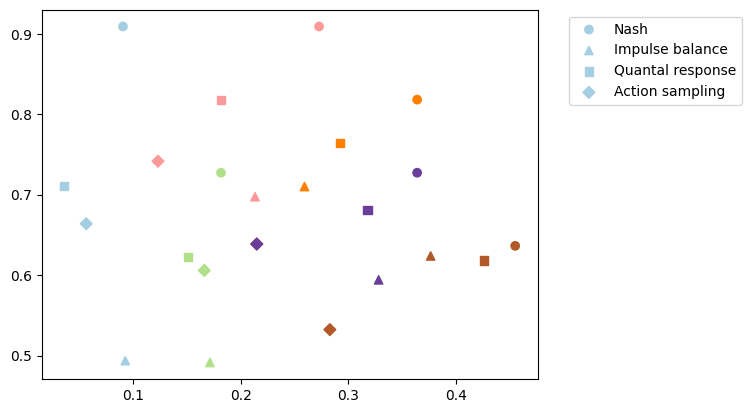

In [50]:
test_ne = [concepts.nash_equilibrium(game) for game in paper_games]
test_ibe = [concepts.impulse_balance_equilibrium(game) for game in paper_games]
test_qre = [concepts.quantal_response_equilibrium(game, 1.5) for game in paper_games]
test_ase = [concepts.action_sampling_equilibrium(game) for game in paper_games]

ne_pts = [(p,q) for (p, _, q, _) in test_ne]
ibe_pts = [(p,q) for (p, _, q, _) in test_ibe]
qre_pts = [(p,q) for (p, _, q, _) in test_qre]
ase_pts = [(p,q) for (p, _, q, _) in test_ase]

colors = range(6)

plt.scatter(*zip(*ne_pts), c=colors, cmap=cm.Paired, marker="o")
plt.scatter(*zip(*ibe_pts), c=colors, cmap=cm.Paired, marker="^")
plt.scatter(*zip(*qre_pts), c=colors, cmap=cm.Paired, marker="s")
plt.scatter(*zip(*ase_pts), c=colors, cmap=cm.Paired, marker="D")

plt.legend(["Nash", "Impulse balance", "Quantal response", "Action sampling"],
bbox_to_anchor=(1.05, 1.0), loc='upper left')



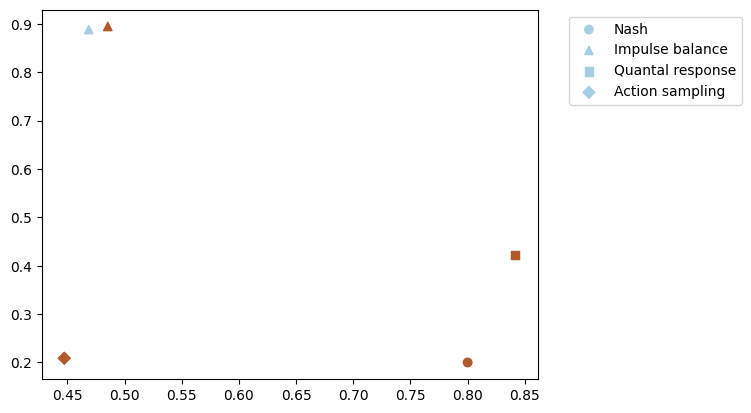

In [13]:
winning_games = [games[i] for i in winners]

test_ne = [concepts.nash_equilibrium(game) for game in winning_games]
test_ibe = [concepts.impulse_balance_equilibrium(game) for game in winning_games]
test_qre = [concepts.quantal_response_equilibrium(game, 1.5) for game in winning_games]
test_ase = [concepts.action_sampling_equilibrium(game) for game in winning_games]

ne_pts = [(p,q) for (p, _, q, _) in test_ne]
ibe_pts = [(p,q) for (p, _, q, _) in test_ibe]
qre_pts = [(p,q) for (p, _, q, _) in test_qre]
ase_pts = [(p,q) for (p, _, q, _) in test_ase]

colors = range(2)

plt.scatter(*zip(*ne_pts), c=colors, cmap=cm.Paired, marker="o")
plt.scatter(*zip(*ibe_pts), c=colors, cmap=cm.Paired, marker="^")
plt.scatter(*zip(*qre_pts), c=colors, cmap=cm.Paired, marker="s")
plt.scatter(*zip(*ase_pts), c=colors, cmap=cm.Paired, marker="D")

plt.legend(["Nash", "Impulse balance", "Quantal response", "Action sampling"],
bbox_to_anchor=(1.05, 1.0), loc='upper left')